---

### Project 1 - Housing Prices Prediction 
### Part 3: Machine Learning - Ensemble Models: Random Forest, Boosting.

---

In this Part of the Project we will build 2 Ensemble Models: a Random Forest Regressor and a Gradient Boosting Regressor (both with hyperparameter optimization).  
Our benchmark model will be the Knn model, which got the best results ($R^2$=0.8674, $RMSE$=34054) in Part 1 of the project.   
Metrics used:  $R^2$ (scale free, for Model performance) and $RMSE$ (target variable unit, for standard deviation of residuals measurement).  
The dataset used is Properati's version analized and filtered in Part 1.  

Notebook content:

1. Data Preparation
2. Models training, evaluation and error analysis
3. Model selection  
4. Feature importance analysis
5. Residuals analysis
6. Conclusion

### 1. Data Preparation
---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 

sns.set()

In [2]:
warnings.simplefilter('ignore')

Import dataset.

In [3]:
df = pd.read_csv('datasets/ds_final.csv')

In [4]:
ds = df.copy()

In this notebook we will train 3 basic models. Benchmark, Metrics, Hyperparameter (manual) tuning

Features 'X' and Target 'y' selection.

In [5]:
X = ds.drop(columns='price')
y = ds['price']

print('X shape: {}'.format(X.shape))
print('y shape: {}'.format(y.shape))

X shape: (64482, 10)
y shape: (64482,)


Train/Test split.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [7]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape)) 
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (48361, 10)
y_train shape: (48361,)
X_test shape: (16121, 10)
y_test shape: (16121,)


Scaling data.

In [8]:
scaler = StandardScaler()

In [9]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 2. Models training, evaluation and error analysis
---

Defining R² and RMSE calculation function. 

In [10]:
def model_results(model, name):
    
    pred_model_train = model.predict(X_train)
    pred_model_test = model.predict(X_test)

    print(f'{name}:')
    print('R² in Train Set: {:.4f}'.format(model.score(X_train, y_train)))
    print('RMSE in Train Set: {:.4f}'.format(np.sqrt(mean_squared_error(pred_model_train, y_train))))
    print('R² in Test Set: {:.4f}'.format(model.score(X_test, y_test)))
    print('RMSE in Test Set: {:.4f}'.format(np.sqrt(mean_squared_error(y_test, pred_model_test))))  

Defining function for:
1. Models error calculation. 
2. Error distribution plotting.
3. Real values vs Predicted values plotting.

In [19]:
def model_graphs(model, name):
    
    model.fit(X_train ,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
       
    plt.figure(figsize = (12,6))
    plt.suptitle(f'Model: {name}', fontsize=18)

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
    plt.title('Error distribution', fontsize=16)
    plt.xlabel('Error', size=13)
    plt.ylabel('Density', size=13)
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.title('Price dispersion', fontsize=16)
    plt.xlabel('Real values', size=13)
    plt.ylabel('Predicted values', size=13)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85) 

    plt.show()

Plotting function for Real and Predicted Price values distribution.

In [12]:
def model_prediction_dist(model, name):

    prediction = model.predict(X_test)

    plt.figure(figsize=(11,6))

    sns.distplot(y_test, hist=True, kde=False)
    sns.distplot(prediction, hist=True, kde=False)
    plt.legend(labels=['Price real values', 'Price predicted values'], prop={"size":12})
    plt.title(f'Model: {name}\n Real values vs. Predicted values', size=17)
    plt.xlabel('Price', size=13)
    plt.ylabel('Properties', size=13)
    plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0))

#     plt.xlim(0,1750000)

Grid Search results plotting function.

In [13]:
def grid_results(grid):
    
    print('Best Hiperparameters:', grid.best_params_)
    print('CV mean results:', grid.best_score_)

Feature importance plotting function.

In [14]:
def feature_importance(model, nombre):
    
    importances = model.feature_importances_
    columns = X.columns
    
    plt.figure(figsize=(12,5))
    
    sns.barplot(columns, importances)
    plt.xticks(rotation=45, horizontalalignment='right')
    plt.xlabel('Features', fontsize=13)
    plt.ylabel('Importance', fontsize=13)
    plt.title(f'Feature Importance\n Model: {nombre}', fontsize=18)
    
    plt.show()

### Model 1: Random Forest  

Hyperparameters grid search.

In [16]:
forest_grid = {'n_estimators': [50, 100, 200, 300, 400, 500], 
                'max_features': [3, 6, 9], 
                'max_depth': [5, 10, 20, 30, 40, 60, None]}   

In [17]:
forest = RandomForestRegressor(random_state=42, n_jobs=-1)

In [18]:
forest_gs = GridSearchCV(forest, forest_grid, cv=5,  n_jobs=-1)

In [19]:
forest_gs.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 30, 40, 60, None],
                         'max_features': [3, 6, 9],
                         'n_estimators': [50, 100, 200, 300, 400, 500]})

Grid search check.

In [44]:
grid_results(forest_gs)

Mejores Hiperparámetros: {'max_depth': 30, 'max_features': 6, 'n_estimators': 400}
Promedio resultados CV: 0.9082088997496396


Model building.

In [15]:
forest_t = RandomForestRegressor(max_features=6, n_estimators=400, max_depth=30, n_jobs=-1, random_state=42)

In [16]:
forest_t.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, max_features=6, n_estimators=400, n_jobs=-1,
                      random_state=42)

Model evaluation.

In [17]:
model_results(forest_t, 'Random Forest')

Random Forest:
R² in Train Set: 0.9862
RMSE in Train Set: 11067.2516
R² in Test Set: 0.9154
RMSE in Test Set: 27195.8504


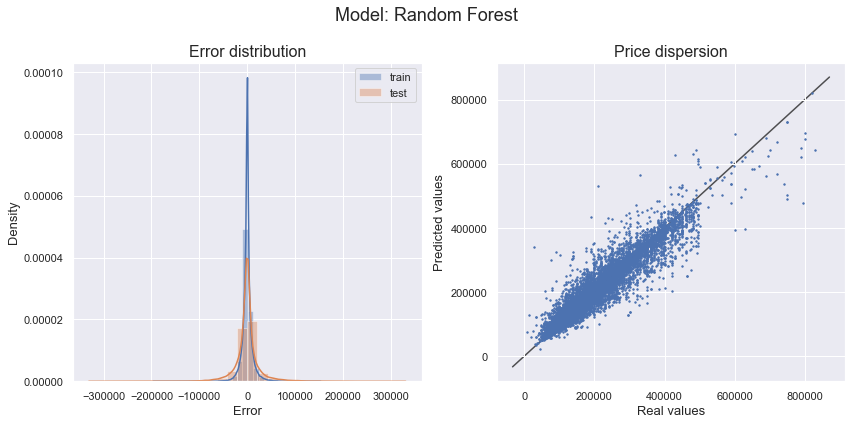

In [20]:
model_graphs(forest_t, 'Random Forest')

**Figure 1** - Random Forest Model error distribution (both sets) and Price predicted vs real values dispersion (test set).

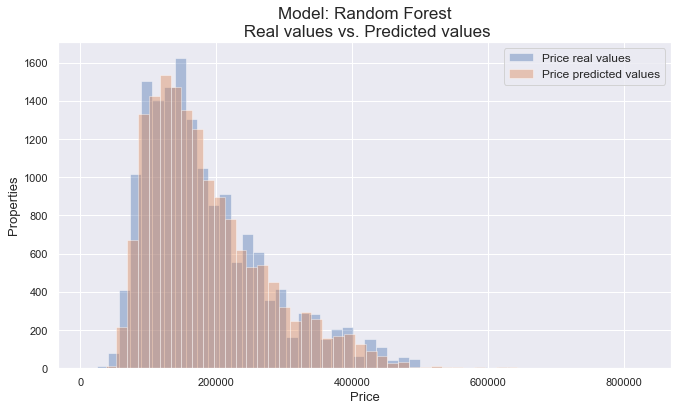

In [18]:
model_prediction_dist(forest_t, 'Random Forest')

**Figure 2.** Price real and Random Forest Model predicted values distributions (test set).

The Random Forest model greatly outperformed the benchmark model with the  $R²$=0.9154 and $RMSE$=27195 results in the test set.  
In the dispersion plot we can clearly see that this model does a better job and brings closer to the diagonal the disperse points after 50000, while in the histogram the better performance is noticeable in the greater similarity of both sets output values distributions.

This ensemble model improves generalization thanks to the randomness in the selection of instances (Bagging) and Features, and the multiple trees used together.

### Model 2: Gradient Boosting Regressor

Hyperparameters grid search.

In [26]:
gbr_grid = {'n_estimators': [50, 100, 200, 300, 400], 
                  'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0], 
                  'max_features': [3, 6, 9],
                  'max_depth': [3, 5, 10, 20]}                                                      

In [27]:
gbr = GradientBoostingRegressor(random_state=42)

In [28]:
gbr_gs = GridSearchCV(gbr, gbr_grid, cv=5, n_jobs=-1)

In [29]:
gbr_gs.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'max_depth': [3, 5, 10, 20], 'max_features': [3, 6, 9],
                         'n_estimators': [50, 100, 200, 300, 400]})

Grid search check.

In [31]:
grid_results(gbr_gs)

Best Hiperparameters: {'learning_rate': 0.1, 'max_depth': 10, 'max_features': 6, 'n_estimators': 400}
CV mean results: 0.9122124150279957


Model building.

In [14]:
gbr_t = GradientBoostingRegressor(max_depth=10, n_estimators=400, max_features=6, learning_rate=0.1, random_state=42)

In [15]:
gbr_t.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=10, max_features=6, n_estimators=400,
                          random_state=42)

Model evaluation.

In [34]:
model_results(gbr_t, 'Gradient Boosting')

Gradient Boosting:
R² en Train Set: 0.9866
RMSE en Train Set: 10913.6054
R² en Test Set: 0.9162
RMSE en Test Set: 27076.8693


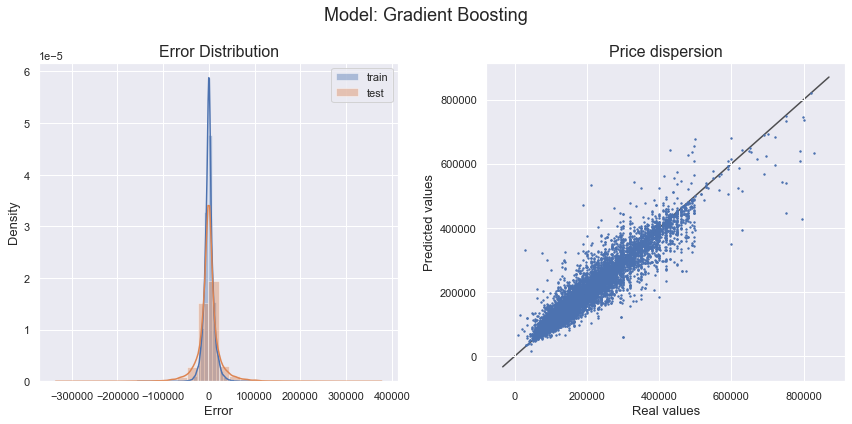

In [35]:
model_graphs(gbr_t, 'Gradient Boosting')

**Figure 3** - Gradient Boosting Model error distribution (both sets) and Price predicted vs real values dispersion (test set).

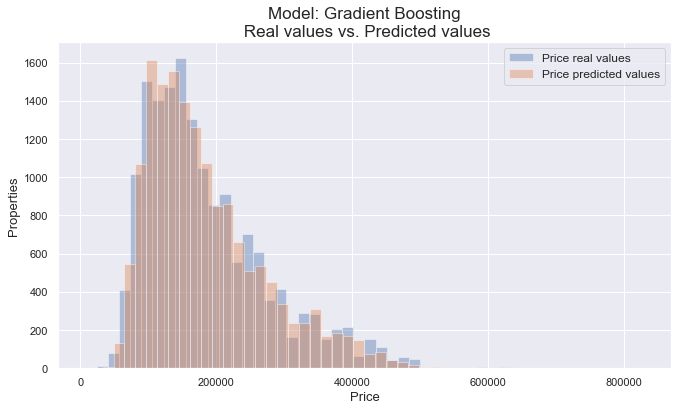

In [38]:
model_prediction_dist(gbr_t, 'Gradient Boosting')

**Figure 4.** Price real and Gradient Boosting Model predicted values distributions (test set).

Gradient Boosting model also far outperformed the Bechmark model.  
The dispersion plot, although is similar to the Random Forest one, shows how Gradient Boosting achieves a better approximation of several points to the diagonal, although we continue seeing scattered points from approximately 300,000 until the end of the range.

### 3. Model selection
---

In [39]:
formt = lambda x: float("{:.4f}".format(x))

regressor = ['Random Forest', 'Gradient Boosting']
models = [forest_t, gbr_t]

R2_Train, R2_Test, RMSE_Train, RMSE_Test = [], [], [], []

for m in models:
    R2_Train.append(formt(m.score(X_train, y_train)))
    R2_Test.append(formt(m.score(X_test, y_test)))
    RMSE_Train.append(formt(np.sqrt(mean_squared_error(m.predict(X_train), y_train))))
    RMSE_Test.append(formt(np.sqrt(mean_squared_error(y_test, m.predict(X_test)))))

results = pd.DataFrame({'R² Train':R2_Train, 'R² Test':R2_Test,'RMSE Train':RMSE_Train,'RMSE Test':RMSE_Test}, index=regressor)
    
results

,R² Train,R² Test,RMSE Train,RMSE Test
Random Forest,0.9862,0.9154,11067.2516,27195.8504
Gradient Boosting,0.9866,0.9162,10913.6054,27076.8693


Gradient Boosting model slightly outperformed the Random Forest model becoming our selected model, so we will continue studing its performance and results.

### 4. Feature Importance analysis
---

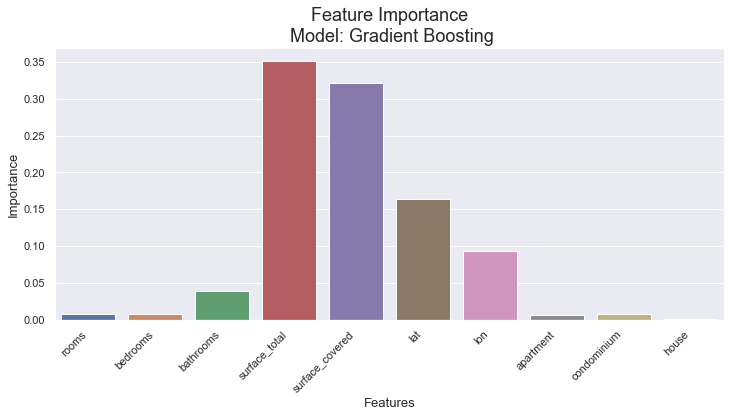

In [42]:
feature_importance(gbr_t, 'Gradient Boosting')

**Figure 5.** Importance of each feature in Gradient Boosting building.

Most important variables for the assembly of our model were the two corresponding to the size of the surface 'surface_covered' and 'surface_total', followed by the two geographical variables 'lat' and 'lon'.

Regarding the variables with low value, it should be noted that this does not necessarily mean that they were not important for the prediction, but that they were not chosen in the first levels of the corresponding trees that shaped the ensemble. This could be due to high correlation with another variable, highly probable in the case of 'rooms' and 'bedrooms'.

We will randomly select particular trees from the ensemble and analyze the importance of the variables in each one of them.

In [43]:
tree8=gbr_t.estimators_[8]
tree10=gbr_t.estimators_[10]
tree100=gbr_t.estimators_[100]

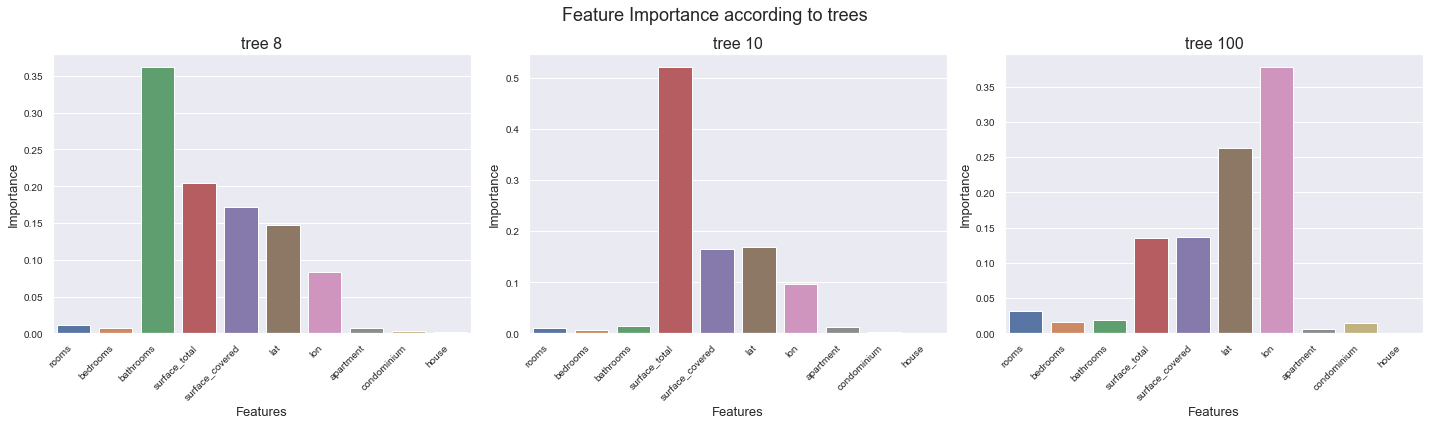

In [44]:
plt.figure(figsize=(20, 6))

k=1
j=0
model=[tree8[0], tree10[0], tree100[0]]
name=['8','10','100']

for i in model:
    importances = i.feature_importances_
    columns = X.columns

    plt.subplot(1,3,k)
    sns.barplot(columns, importances)

    plt.xlabel('Features', fontsize=13)
    plt.ylabel('Importance', fontsize=13)
    plt.xticks(rotation=45, horizontalalignment='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.title('tree {}'.format(name[j]), fontsize=16)

    k+=1
    j+=1

plt.suptitle('Feature Importance according to trees', fontsize=18)

plt.tight_layout(pad=1.0)
plt.subplots_adjust(top=0.87) 

**Figure 6.** Feature Importance for trees 8, 10 and 100 of the Gradient Boosting ensemble.

Since each tree of the algorithm is trained sequentially on the residual error of the previous one, variables importance changes for each one of the 400 trees that build the ensemble, as can be seen in the 3 trees chosen at random in **Figure 6**. This variation is also increased thanks to the randomness we added to the algorithm by modifying the 'max_features' hyperparameter with the value indicated by the Grid Search.

### 5. Residuals analysis
---

We start by showing the dispersion graph that compares real and predicted values of variable 'price' for train and test sets.

In [38]:
y_train_pred = gbr_t.predict(X_train)
y_test_pred = gbr_t.predict(X_test)

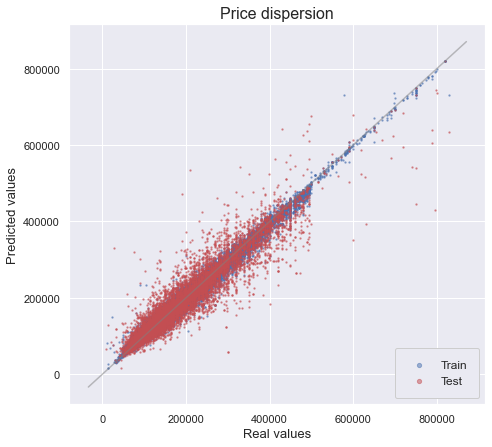

In [47]:
plt.figure(figsize = (7,7))

ax = plt.subplot()

ax.scatter(y_train, y_train_pred, s=2, color='b', alpha=0.5, label='Train')
ax.scatter(y_test, y_test_pred, s=2, color='r', alpha=0.5, label='Test')

lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  
        np.max([ax.get_xlim(), ax.get_ylim()])]

plt.legend(fancybox=True, framealpha=10, borderpad=1, markerscale=3, scatterpoints=1, fontsize=12, loc="lower right")
ax.plot(lims, lims, 'grey', alpha=0.5, zorder=1)
plt.title('Price dispersion', fontsize=16)
plt.xlabel('Real values', size=13)
plt.ylabel('Predicted values', size=13)

plt.tight_layout()
plt.subplots_adjust(top=0.85) 

plt.show()

**Figure 7.** Price predicted values dispersion vs. real values (both sets).

In **Figure 7** it can be seen that red dots are more dispersed, due to the higher estimation error of the model in the test set than in the train set.

A greater number of concentrated points can be noted up to 300,000 than in the rest of the range, what corresponds to a greater number of instances evaluated by the model in this sector.

We can also notice that there are a majority of points above the diagonal up to approximately 200,000 and then on the contrary, it begins to be more below the diagonal and in a more dispersed way, which is visually noticeable after 300,000. This would be indicating that the model begins mostly with an overvaluation error and as the target variable increases, error begins to be mostly due to undervaluation. This is each time of greater magnitude in the test Set (red dots scattered towards the end of the range).

We now calculate the model residuals in the train and tests sets and visualize them in a Scatterplot.

In [39]:
residual_train = y_train - y_train_pred
residual_test = y_test - y_test_pred

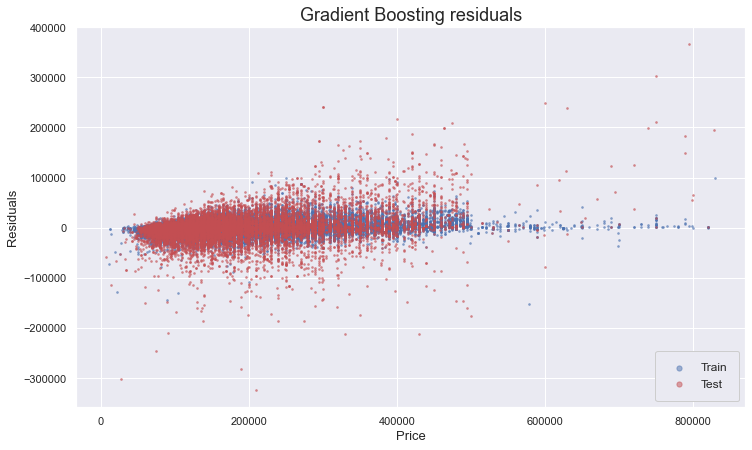

In [50]:
plt.figure(figsize = (12,7))

plt.scatter(y_train, residual_train, c='b', s=3, alpha=0.5, label='Train')
plt.scatter(y_test, residual_test, c='r', s=3, alpha=0.5, label='Test')

plt.legend(fancybox=True, framealpha=10, borderpad=1, markerscale=3, scatterpoints=1, fontsize=12, loc="lower right")
plt.title('Gradient Boosting residuals', fontsize=18)
plt.xlabel('Price', fontsize=13)
plt.ylabel('Residuals', fontsize=13)

plt.show()

**Figure 8.** Gradient Boosting Residual values scatterplot (both sets).

Given that the equation with which we obtain the residuals (Residual = Real Value-Predicted Value), positive values indicate undervaluation and negative values overvaluation.

This plot shows again the largest number of evaluated instances up to 300,000 and also how the red dots disperse upwards from zero from here on, evidencing the undervaluation error of the model in the test set that we noted earlier.  

Looking for a possible explanation, we are going to jointly graph the previous Scatterplot with the prices histogram according to the property type.

In [ ]:
ds_g_8 = pd.read_csv('datasets/ds_g_8')

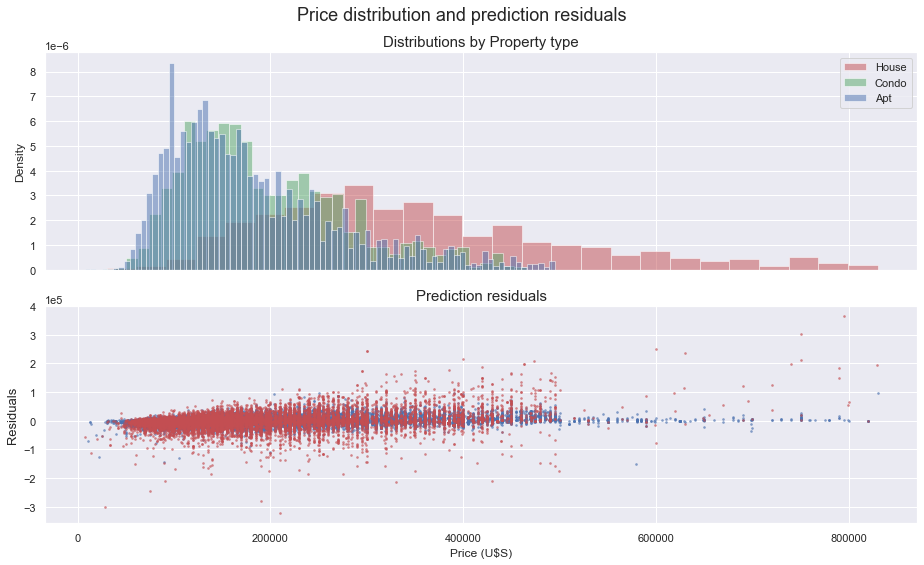

In [49]:
fig, ax = plt.subplots(2, 1, figsize=(13, 8), sharex=True) 
fig.suptitle('Price distribution and prediction residuals', fontsize=18) 

c = ['r', 'g', 'b'] 

ax[0].hist(ds_g_8[ds_g_8['property_type']=='house']['price'], density=True, alpha=0.5, bins='auto', label='House', color=c[0]) 
ax[0].hist(ds_g_8[ds_g_8['property_type']=='condominium']['price'], density=True, alpha=0.5, bins='auto', label='Condo', color=c[1]) 
ax[0].hist(ds_g_8[ds_g_8['property_type']=='apartment']['price'], density=True, alpha=0.5, bins='auto', label='Apt', color=c[2]) 
ax[0].legend(loc='upper right')
ax[0].set_title('Distributions by Property type', fontsize=15) 
ax[0].set_ylabel('Density') 
ax[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax[1].scatter(y_train, residual_train, c='b', s=3, alpha=0.5, label='Train')
ax[1].scatter(y_test, residual_test, c='r', s=3, alpha=0.5, label='Test')
ax[1].set_title('Prediction residuals', fontsize=15) 
ax[1].set_ylabel('Residuals', size=13) 
ax[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.xlabel('Price (U$S)')
    
fig.tight_layout() 
fig.subplots_adjust(top=0.9) 

plt.show() 

**Figure 9.** Price distributions by Property type combined with Gradient Boosting Model Price prediction residuals.

Undervaluation errors from 300,000 onwards coincide with the decrease in the number of 'condominium' and 'apartment'  properties types in that range, and with the higher presence of 'house' type.

### 6. Conclusion

In Part 2 of the project we tested 2 models (Knn and Decision Tree) against a benchmark 1 (Linear Regression), been the Knn the one with the best performance becoming our new benchmark 2. In Part 3 we build 2 new ensemble models (Random Forest and Gradient Boosting) using more powerful algorithms, both of them outperforming the benchmark 2.
Although both ensembles models had similar results, the Gradient Boosting tuned model had slightly better performance, obtaining $R^2$=0.9163 and $RMSE$=27076.

Dataset filtering and feature selection  and hyperparameters tuning through Grid Search, allowed us to obtain a  Gradient Boosting Model which R²=0.9159 in the test set indicates that 91.63% of the price variance can be predicted, and a RMSE=27076 that the average error of the predictions is U$S 27076, an acceptable value, although it could be improvable, taking into account the average value of a property.

Lastly, the model presented problems predicting the highest values, starting at approximately 400,000. As analyzed in Part 1: that the dataset is unbalanced with respect to the 'property type' variable:

In [81]:
types = ['apartment','condominium','house']
print('Instancies by Property type:')
for t in range(len(types)):
    print(f'{types[t]}:', ds_g_8[ds_g_8['property_type']==types[t]].shape[0])

Instancies by Property type:
apartment: 55122
condominium: 7678
house: 1682


in addition to what is shown in **Figure 9**, we could conclude that our model is having problems predicting the 'house' property type prices. Precisely, these instances are the ones with the least amount available and which price distribution is very different from the other 2 categories.